In [1]:
# Importing the required libraries which can be used in this project

In [2]:
# Problem Statement

#To build an automated system for classifying street images into pollution levels,
# enabling efficient monitoring and assessment of air quality through image analysis.








In [3]:
import tensorflow
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
data_dir=r"C:\Users\kashr\Documents\Deep Learning projects\Automatic recognition of pollution levels from street images\Air Pollution Image Dataset\Air Pollution Image Dataset\Combined_Dataset\IND_and_NEP"
categories=["a_Healthy", "b_Unhealthy"]


In [5]:
data=[]
labels=[]
for idx,category in enumerate(categories):
    path=os.path.join(data_dir,category)
    for img_name in os.listdir(path):
        img_path=os.path.join(path,img_name)
        img=cv2.imread(img_path)
        img=cv2.resize(img,(128,128))  #resizing images to 128*128
        data.append(img)
        labels.append(idx)
data=np.array(data)
labels=np.array(labels)

In [6]:
data=data/255.0 # normalizing the pixel values


In [7]:
#The batch size specifies how many augmented images will be processed by the model in each batch during training, at every epoch.

In [8]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,random_state=42,test_size=0.2)

In [9]:
# Image Data Augmentation

In [10]:
datagen=ImageDataGenerator(width_shift_range=0.2,rotation_range=30,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)
datagen.fit(X_train)

# Building CNN Model

# Adding layers

In [11]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

# Adding flatten layer to convert 2d into 1d because dense or fully connected layers because it requires a 1d input vector
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid')) #output layer

C:\Users\kashr\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,580,673 (6.03 MB)

 Trainable params: 1,580,673 (6.03 MB)

 Non-trainable params: 0 (0.00 B)

# Compiling and Training the model

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
callback=EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=10,verbose=1)

In [16]:
history=model.fit(datagen.flow(X_train,y_train,batch_size=32),validation_data=(X_test,y_test),epochs=40,callbacks=callback)

C:\Users\kashr\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
141/141 ━━━━━━━━━━━━━━━━━━━━ 122s 818ms/step - accuracy: 0.6690 - loss: 0.5969 - val_accuracy: 0.7863 - val_loss: 0.4437
Epoch 2/40
141/141 ━━━━━━━━━━━━━━━━━━━━ 131s 930ms/step - accuracy: 0.7908 - loss: 0.4459 - val_accuracy: 0.7846 - val_loss: 0.4299
Epoch 3/40
141/141 ━━━━━━━━━━━━━━━━━━━━ 111s 785ms/step - accuracy: 0.7979 - loss: 0.4480 - val_accuracy: 0.7252 - val_loss: 0.6196
Epoch 4/40
141/141 ━━━━━━━━━━━━━━━━━━━━ 108s 765ms/step - accuracy: 0.7992 - loss: 0.4340 - val_accuracy: 0.7908 - val_loss: 0.4028
Epoch 5/40
141/141 ━━━━━━━━━━━━━━━━━━━━ 109s 773ms/step - accuracy: 0.8042 - loss: 0.4223 - val_accuracy: 0.8121 - val_loss: 0.3852
Epoch 6/40
141/141 ━━━━━━━━━━━━━━━━━━━━ 110s 779ms/step - accuracy: 0.8069 - loss: 0.4147 - val_accuracy: 0.7899 - val_loss: 0.4087
Epoch 7/40
141/141 ━━━━━━━━━━━━━━━━━━━━ 141s 771ms/step - accuracy: 0.8141 - loss: 0.4114 - val_accuracy: 0.8156 - val_loss: 0.3998
Epoch 8/40
141/141 ━━━━━━━━━━━━━━━━━━━━ 114s 808ms/step - accuracy: 0.8087 -

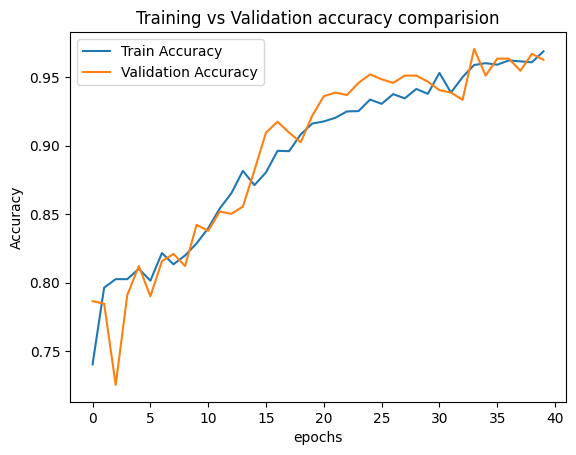

In [17]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation accuracy comparision')
plt.legend()
plt.show()

In [18]:
test_loss,test_accuracy=model.evaluate(X_test,y_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.9640 - loss: 0.0889


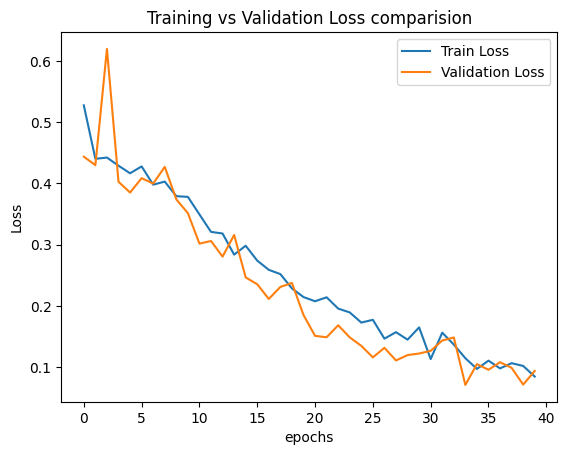

In [19]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss comparision')
plt.legend()
plt.show()

# Testing whether our model is working correctly or not

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
[[1.]]
The model predicts the image belongs to the class: b_Unhealthy


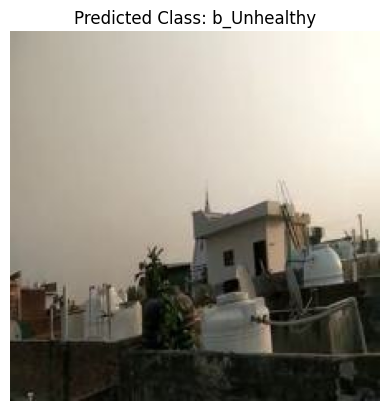

In [20]:

def preprocess_image(img_path):
    """
    Preprocess a single image for prediction.
    Args:
        img_path (str): Path to the image.
    Returns:
        numpy.ndarray: Preprocessed image.
    """
    img = cv2.imread(img_path)  # Read the image
    img = cv2.resize(img, (128, 128))  # Resize to match model input
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def predict_image(model, img_path, categories):
    """
    Predict the class of a single image using the trained model.
    Args:
        model: Trained TensorFlow/Keras model.
        img_path (str): Path to the image.
        categories (list): List of category labels.
    Returns:
        str: Predicted category.
    """
    img = preprocess_image(img_path)
    prediction = model.predict(img)  # Get prediction
    print(prediction)
    class_index = 1 if prediction[0] > 0.5 else 0  # Threshold for binary classification
    predicted_category = categories[class_index]
    return predicted_category

# Path to the test image
test_image_path = r"C:\Users\kashr\Documents\Deep Learning projects\Automatic recognition of pollution levels from street images\Air Pollution Image Dataset\Air Pollution Image Dataset\Combined_Dataset\IND_and_NEP\b_Unhealthy\HAR_VUN_2022-10-02-10.00-1-673.jpg"  # Replace with your test image path

# Predict and display result
predicted_class = predict_image(model, test_image_path, categories)
print(f"The model predicts the image belongs to the class: {predicted_class}")

# Display the test image
img_to_show = cv2.imread(test_image_path)
plt.imshow(cv2.cvtColor(img_to_show, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[4.4896663e-07]]
The model predicts the image belongs to the class: a_Healthy


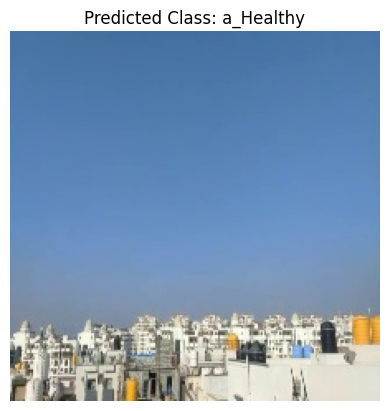

In [21]:

test_image_path = r"C:\Users\kashr\Documents\Deep Learning projects\Automatic recognition of pollution levels from street images\Air Pollution Image Dataset\Air Pollution Image Dataset\Combined_Dataset\IND_and_NEP\a_Healthy\BENGR_Good_2023-02-19-08.30-1-15.jpg"
# Predict and display result
predicted_class = predict_image(model, test_image_path, categories)
print(f"The model predicts the image belongs to the class: {predicted_class}")

# Display the test image
img_to_show = cv2.imread(test_image_path)
plt.imshow(cv2.cvtColor(img_to_show, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()


In [24]:
model.save('CNN_system_by_ravikash.h5')